# Housing Prices Regression – Supervised Learning

The project is a regression machine learning study aimed at predicting house prices using a dataset containing various features of houses. I plan on implementing a random forest regressor along with a gradient boosting model and compare their performance using different evaluation metrics. It is broken off into three main portions/notebooks
 
<br>1) **Extract, Transform, Load**</br>
<br>2) **Explanatory Data Analysis**</br>
<br>3) **Training a model**</br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

Data collected by Dr. DeCock in the Journal of Statistical Education (2011). Additional information can be found here
https://jse.amstat.org/v19n3/decock.pdf

In [39]:
ames = pd.read_csv(r'..\data\raw\ames.csv', low_memory=False)

In [40]:
# Remove the '.' from column names
ames.columns = [x.replace('.', '') for x in ames.columns]

A total of 2,930 rows and 82 columns. 20 of which are quantitative values, the rest are categorical or ordinal.

In [62]:
ames.shape

(2930, 82)

Instead of iterating through all available features we can choose a subset that we think is important based off of our experience with real estate prices. While the subset we choose isn't guaranteed to be the best subset out there it will massively help with the EDA process and the time take to complete the project.

In [63]:
# Select subset of columns to use
categorical = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood',
                'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
                'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageType',
                'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'PoolArea',
                'SaleCondition', 'OverallQual', 'OverallCond']

numerical = ['price', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 
            'area', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea']

to_engineer = ['YearRemodAdd', 'YrSold']

In [64]:
columns_to_use = categorical+numerical+to_engineer

In [65]:
ames_truncated = ames[columns_to_use].copy()

In [66]:
ames_truncated.shape

(2930, 49)

In [45]:
# Quick glance at the data
with pd.option_context("display.max_columns", None):
    display(ames_truncated[sorted(ames_truncated.columns)].sample(10))

,BedroomAbvGr,BldgType,BsmtCond,BsmtFinSF1,BsmtFinType1,BsmtQual,CentralAir,Electrical,EnclosedPorch,ExterCond,ExterQual,Fireplaces,Foundation,Functional,GarageArea,GarageCars,GarageType,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LotArea,LotConfig,LotShape,LowQualFinSF,MSSubClass,MSZoning,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,SaleCondition,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,X1stFlrSF,X2ndFlrSF,X3SsnPorch,YearRemodAdd,YrSold,area,price
1531,3,1Fam,TA,0.0,Unf,Gd,Y,SBrkr,112,Fa,TA,1,BrkTil,Typ,270.0,1.0,Attchd,GasA,TA,2Story,1,TA,HLS,7200,Inside,Reg,0,70,RL,Crawfor,0,6,7,P,0,Normal,0,Pave,6,776.0,AllPub,0,851,651,0,2000,2008,1502,149000
2183,2,1Fam,TA,77.0,Rec,TA,Y,SBrkr,35,TA,TA,0,CBlock,Typ,392.0,1.0,Detchd,GasA,Ex,1Story,1,Fa,Lvl,6400,Inside,Reg,0,20,RL,Edwards,0,7,5,Y,0,Normal,0,Pave,4,960.0,AllPub,144,960,0,0,2000,2007,960,131750
1283,3,1Fam,TA,96.0,GLQ,TA,N,SBrkr,0,TA,TA,0,PConc,Typ,308.0,1.0,Detchd,GasA,Gd,1Story,1,TA,Bnk,9836,Inside,Reg,0,20,RM,OldTown,175,5,6,Y,0,Abnorml,0,Pave,7,192.0,AllPub,0,1133,0,0,2008,2008,1133,143000
1084,2,1Fam,TA,0.0,Unf,Gd,Y,SBrkr,0,TA,Gd,1,PConc,Typ,428.0,2.0,Attchd,GasA,Ex,1Story,1,Gd,Lvl,3710,Inside,Reg,0,20,RL,Blmngtn,24,5,7,Y,0,Partial,0,Pave,5,1146.0,AllPub,100,1246,0,0,2008,2008,1246,187687
82,2,1Fam,TA,0.0,Unf,TA,N,FuseA,80,Fa,TA,0,BrkTil,Typ,429.0,1.0,Detchd,GasA,TA,1Story,1,TA,Lvl,9800,Corner,Reg,0,30,RH,SawyerW,0,5,5,Y,0,Normal,0,Pave,5,816.0,AllPub,121,1012,0,0,1950,2010,1012,67500
195,3,1Fam,TA,264.0,LwQ,TA,Y,FuseA,0,Gd,TA,2,CBlock,Typ,576.0,2.0,Detchd,GasA,Ex,1.5Fin,1,TA,Lvl,6000,Inside,Reg,0,50,RM,BrkSide,0,6,6,Y,0,Normal,0,Pave,6,572.0,AllPub,0,848,348,0,1950,2010,1196,128000
840,3,1Fam,TA,0.0,Unf,Gd,Y,SBrkr,0,TA,TA,0,PConc,Typ,672.0,2.0,Attchd,GasA,Ex,1Story,1,TA,Lvl,10859,Corner,Reg,0,20,RL,CollgCr,64,5,5,Y,0,Normal,0,Pave,6,1097.0,AllPub,392,1097,0,0,1995,2009,1097,145000
1171,2,TwnhsE,TA,1238.0,GLQ,Ex,Y,SBrkr,0,TA,Gd,1,PConc,Typ,506.0,2.0,Attchd,GasA,Ex,1Story,1,Gd,Lvl,5119,CulDSac,IR1,0,120,FV,Somerst,65,5,9,Y,0,Abnorml,0,Pave,5,1698.0,AllPub,97,1709,0,0,2000,2008,1709,328900
1481,1,TwnhsE,TA,697.0,GLQ,Gd,Y,SBrkr,0,TA,Gd,1,PConc,Typ,420.0,2.0,Attchd,GasA,Ex,1Story,1,Gd,Lvl,4426,Inside,Reg,0,120,RM,CollgCr,0,5,6,Y,0,Normal,0,Pave,3,848.0,AllPub,149,848,0,0,2004,2008,848,149300
2176,5,Duplex,NaN,0.0,NaN,NaN,Y,SBrkr,0,TA,TA,0,Slab,Typ,579.0,2.0,Attchd,GasA,TA,2Story,2,TA,Lvl,9555,CulDSac,IR1,0,90,RL,Edwards,0,6,5,Y,0,Normal,0,Pave,11,0.0,AllPub,0,1100,1133,0,1979,2007,2233,141000


## Deal with Missing Values

In [46]:
# Look at percentage of missing NA's
ames_truncated.isna().sum().loc[lambda x: x > 0].divide(ames_truncated.shape[0]).sort_values(ascending=False).round(5)*100

GarageType      5.358
BsmtQual        2.730
BsmtCond        2.730
BsmtFinType1    2.730
Electrical      0.034
BsmtFinSF1      0.034
TotalBsmtSF     0.034
GarageCars      0.034
GarageArea      0.034
dtype: float64

<AxesSubplot: >

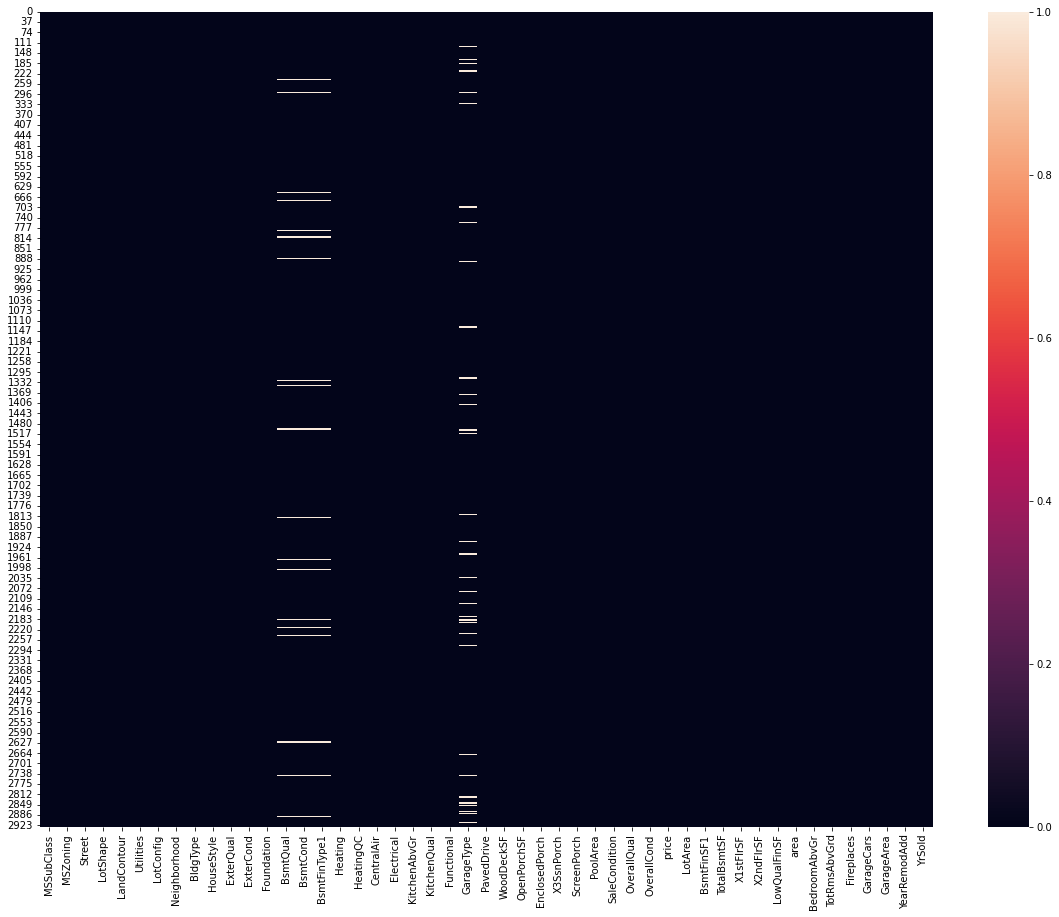

In [67]:
# We can plot a heatmap to see nulls
plt.figure(figsize=(20,15))
sns.heatmap(ames_truncated.isna())

We need to analyze individual nulls to understand whether we need to impute or remove the observation

In [47]:
ames_truncated['BsmtQual'].value_counts(dropna=False)

TA     1283
Gd     1219
Ex      258
Fa       88
NaN      80
Po        2
Name: BsmtQual, dtype: int64

In [48]:
# Missing basement quality usually means no basement
ames_truncated[ames_truncated['BsmtQual'].isna()][[x for x in ames_truncated.columns if 'Bsmt' in x]]

,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,TotalBsmtSF
83,NaN,NaN,NaN,0.0,0.0
154,NaN,NaN,NaN,0.0,0.0
206,NaN,NaN,NaN,0.0,0.0
243,NaN,NaN,NaN,0.0,0.0
273,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...
2739,NaN,NaN,NaN,0.0,0.0
2744,NaN,NaN,NaN,0.0,0.0
2879,NaN,NaN,NaN,0.0,0.0
2892,NaN,NaN,NaN,0.0,0.0


In [49]:
ames_truncated[ames_truncated['GarageType'].isna()][[x for x in ames_truncated.columns if 'Garage' in x]]

,GarageType,GarageCars,GarageArea
27,NaN,0.0,0.0
119,NaN,0.0,0.0
125,NaN,0.0,0.0
129,NaN,0.0,0.0
130,NaN,0.0,0.0
...,...,...,...
2913,NaN,0.0,0.0
2916,NaN,0.0,0.0
2918,NaN,0.0,0.0
2919,NaN,0.0,0.0


In [50]:
# Fill with None for missing category values
for column in ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'GarageType']:
    ames_truncated[column].fillna('None', inplace=True)

In [51]:
# Fill with zeros for category values
for column in ['TotalBsmtSF', 'BsmtFinSF1', 'GarageCars', 'GarageArea']:
    ames_truncated[column].fillna(0, inplace=True)

In [52]:
ames_truncated['Electrical'].value_counts(dropna=False)

SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
NaN         1
Mix         1
Name: Electrical, dtype: int64

In [53]:
ames_truncated['Electrical'].fillna(ames_truncated['Electrical'].mode().values[0], inplace=True)

In [54]:
assert ames_truncated.isna().sum().sum() == 0, 'Some NAs still present in data'

Missing values do not indicate an issue with the data, missing value for Pool Quality simply means that there is no pool. If all of these were to be overwritten the feature would not be that useful.

## Fix Datatypes

In [55]:
# Change categorical columns to categories
ames_truncated[categorical] = ames_truncated[categorical].astype('category')
ames_truncated[numerical] = ames_truncated[numerical].astype('int64')

In [56]:
# All existing numerical types are already int
all(ames_truncated[numerical].dtypes == 'int64')

True

In [57]:
ames_truncated.to_parquet(r'..\data\processed\training_cleaned.parquet')